In [3]:
#OS
# import io
# from google.colab import files
# import multiprocessing

#Basic
import numpy as np
import pandas as pd

#NLP
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import gensim
from gensim.models import Word2Vec
from gensim.models import Doc2Vec

#Text
from string import punctuation
from string import digits
import re

#Vis
from sklearn.decomposition import PCA
from wordcloud import WordCloud, STOPWORDS
# from colour import Color
import seaborn as sns
import matplotlib.pyplot as plt

#ML
from sklearn.feature_extraction.text import CountVectorizer
# import textstat

# import statsmodels.formula.api as sm
# import scipy.optimize
# import scipy
# import scipy.stats

[nltk_data] Downloading package stopwords to /home/tima/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/tima/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/tima/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
amazon_reviews = pd.read_csv('Reviews.csv')
amazon_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


## Data Cleaning

In [52]:
amazon_reviews_cleaned = amazon_reviews.copy()

In [53]:
#Handling NaNs
missing_values_count = amazon_reviews_cleaned.isnull().sum()
missing_valuess_prectange = (missing_values_count / len(amazon_reviews_cleaned) * 100).round(1)
missing_table = pd.concat([missing_values_count, missing_valuess_prectange], axis=1)
missing_table.columns = ["Missing Count", "Missing %"]
missing_table

,Missing Count,Missing %
Id,0,0.0
ProductId,0,0.0
UserId,0,0.0
ProfileName,16,0.0
HelpfulnessNumerator,0,0.0
HelpfulnessDenominator,0,0.0
Score,0,0.0
Time,0,0.0
Summary,27,0.0
Text,0,0.0


In [54]:
amazon_reviews_cleaned = amazon_reviews_cleaned.dropna(subset = ['ProfileName', 'Summary'])

missing_values_count = amazon_reviews_cleaned.isnull().sum()
missing_valuess_prectange = (missing_values_count / len(amazon_reviews_cleaned) * 100).round(1)
missing_table = pd.concat([missing_values_count, missing_valuess_prectange], axis=1)
missing_table.columns = ["Missing Count", "Missing %"]
missing_table

,Missing Count,Missing %
Id,0,0.0
ProductId,0,0.0
UserId,0,0.0
ProfileName,0,0.0
HelpfulnessNumerator,0,0.0
HelpfulnessDenominator,0,0.0
Score,0,0.0
Time,0,0.0
Summary,0,0.0
Text,0,0.0


In [55]:
#Text Cleaning
amazon_reviews_cleaned[['Cleaned_Summary','Cleaned_Text']] = amazon_reviews_cleaned[['Summary','Text']].astype(str)

def clean_text(df, text):

  for i in text:
    df[i] = df[i].astype(str)

    #Lower all characters
    df[i] = df[i].apply(lambda x: x.lower())
    print('Lowercases done!')

    #Remove punctuation
    df[i] = df[i].apply(lambda x: re.sub(r'[^\w\s]', ' ', str(x)))
    print('Removing punctuation done!')

    #Remove non-English characters
    df[i] = df[i].apply(lambda x: re.sub('[^a-zA-Z]', ' ', str(x)))
    df[i] = df[i].apply(lambda x: re.sub('\s+', ' ', str(x)))
    print('Filtering by English done!')

    #Remove URLs
    df[i] = df[i].apply(lambda x: re.sub(r'^https?:\/\/.*[\r\n]*', ' ', str(x), flags=re.MULTILINE))
    print('Eliminating URLs done!')

    #Remove emojis
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                              "]+", flags=re.UNICODE)
    df[i] = df[i].apply(lambda x: re.sub(emoji_pattern, ' ', str(x)))
    print('Emoji cleaning done!', '\n')

  print('All done!')

In [56]:
clean_text(amazon_reviews_cleaned,['Cleaned_Summary', 'Cleaned_Text'])

Lowercases done!
Removing punctuation done!
Filtering by English done!
Eliminating URLs done!
Emoji cleaning done! 

Lowercases done!
Removing punctuation done!
Filtering by English done!
Eliminating URLs done!
Emoji cleaning done! 

All done!


## Data Preprocessing

In [57]:
amazon_reviews_pre = amazon_reviews_cleaned.copy()

In [58]:
#List before tokenizing
summary_list = amazon_reviews_pre['Cleaned_Summary'].tolist()
text_list = amazon_reviews_pre['Cleaned_Text'].tolist()

#Tokenize

def tokenize(df, text):
  for i in text:
    df[i] = df[i].apply(lambda x: x.split(" "))

def strip(word):
    return word.strip

In [59]:
tokenize(amazon_reviews_pre,['Cleaned_Summary', 'Cleaned_Text'])

for i in amazon_reviews_pre[['Cleaned_Summary','Cleaned_Text']]:
    map(strip,  i)
    
amazon_reviews_pre['Cleaned_Summary'] = amazon_reviews_pre['Cleaned_Summary'].tolist()
amazon_reviews_pre['Cleaned_Text'] = amazon_reviews_pre['Cleaned_Text'].tolist()

In [35]:
#Test
amazon_reviews_pre[['Cleaned_Summary','Cleaned_Text']]

,Cleaned_Summary,Cleaned_Text
0,"[good, quality, dog, food]","[i, have, bought, several, of, the, vitality, ..."
1,"[not, as, advertised]","[product, arrived, labeled, as, jumbo, salted,..."
2,"[, delight, says, it, all]","[this, is, a, confection, that, has, been, aro..."
3,"[cough, medicine]","[if, you, are, looking, for, the, secret, ingr..."
4,"[great, taffy]","[great, taffy, at, a, great, price, there, was..."
...,...,...
568449,"[will, not, do, without]","[great, for, sesame, chicken, this, is, a, goo..."
568450,[disappointed],"[i, m, disappointed, with, the, flavor, the, c..."
568451,"[perfect, for, our, maltipoo]","[these, stars, are, small, so, you, can, give,..."
568452,"[favorite, training, and, reward, treat]","[these, are, the, best, treats, for, training,..."


In [60]:
#Remove stopwords
sw = set(stopwords.words('english'))
new_sw = ['br','href', 'gp', 'team', 'every', 'each', 'though', 'maybe', 'yet', 'bit', 'u', 'b', 'even', 'really']

amazon_reviews_pre['Cleaned_Summary'] = [[w for w in sen if w not in sw] for sen in amazon_reviews_pre['Cleaned_Summary']]
amazon_reviews_pre['Cleaned_Summary'] = [[w for w in sen if w not in new_sw] for sen in amazon_reviews_pre['Cleaned_Summary']]

amazon_reviews_pre['Cleaned_Text'] = [[w for w in sen if w not in sw] for sen in amazon_reviews_pre['Cleaned_Text']]
amazon_reviews_pre['Cleaned_Text'] = [[w for w in sen if w not in new_sw] for sen in amazon_reviews_pre['Cleaned_Text']]

#Remove digits
dg = digits
amazon_reviews_pre['Cleaned_Summary'] = [[w for w in sen if w not in dg] for sen in amazon_reviews_pre['Cleaned_Summary']]
amazon_reviews_pre['Cleaned_Text'] = [[w for w in sen if w not in dg] for sen in amazon_reviews_pre['Cleaned_Text']]

KeyboardInterrupt: 

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 12, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt


In [44]:
# Lemmatize
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

stemmer = nltk.stem.WordNetLemmatizer()
amazon_reviews_cleaned['Cleaned_Summary'] = [[stemmer.lemmatize(w, wn.ADV) for w in sen] for sen in amazon_reviews_cleaned['Cleaned_Summary']]
amazon_reviews_cleaned['Cleaned_Summary'] = [[stemmer.lemmatize(w, wn.ADJ) for w in sen] for sen in amazon_reviews_cleaned['Cleaned_Summary']]
amazon_reviews_cleaned['Cleaned_Summary'] = [[stemmer.lemmatize(w, wn.VERB) for w in sen] for sen in amazon_reviews_cleaned['Cleaned_Summary']]
amazon_reviews_cleaned['Cleaned_Summary'] = [[stemmer.lemmatize(w, wn.NOUN) for w in sen] for sen in amazon_reviews_cleaned['Cleaned_Summary']]

amazon_reviews_cleaned['Cleaned_Text'] = [[stemmer.lemmatize(w, wn.ADV) for w in sen] for sen in amazon_reviews_cleaned['Cleaned_Text']]
amazon_reviews_cleaned['Cleaned_Text'] = [[stemmer.lemmatize(w, wn.ADJ) for w in sen] for sen in amazon_reviews_cleaned['Cleaned_Text']]
amazon_reviews_cleaned['Cleaned_Text'] = [[stemmer.lemmatize(w, wn.VERB) for w in sen] for sen in amazon_reviews_cleaned['Cleaned_Text']]
amazon_reviews_cleaned['Cleaned_Text'] = [[stemmer.lemmatize(w, wn.NOUN) for w in sen] for sen in amazon_reviews_cleaned['Cleaned_Text']]

KeyboardInterrupt: 

In [16]:
#Test
amazon_reviews_pre['Cleaned_Text']

0         [bought, several, vitality, canned, dog, food,...
1         [product, arrived, labeled, jumbo, salted, pea...
2         [confection, around, centuries, light, pillowy...
3         [looking, secret, ingredient, robitussin, beli...
4         [great, taffy, great, price, wide, assortment,...
                                ...                        
568449    [great, sesame, chicken, good, well, resturant...
568450    [disappointed, flavor, chocolate, notes, espec...
568451    [stars, small, give, one, training, session, t...
568452    [best, treats, training, rewarding, dog, good,...
568453    [satisfied, product, advertised, use, cereal, ...
Name: Cleaned_Text, Length: 568411, dtype: object

In [38]:
#Save filtered columns
summary_text = amazon_reviews_pre['Cleaned_Summary']
review_text = amazon_reviews_pre['Cleaned_Text']

## Data Visualization

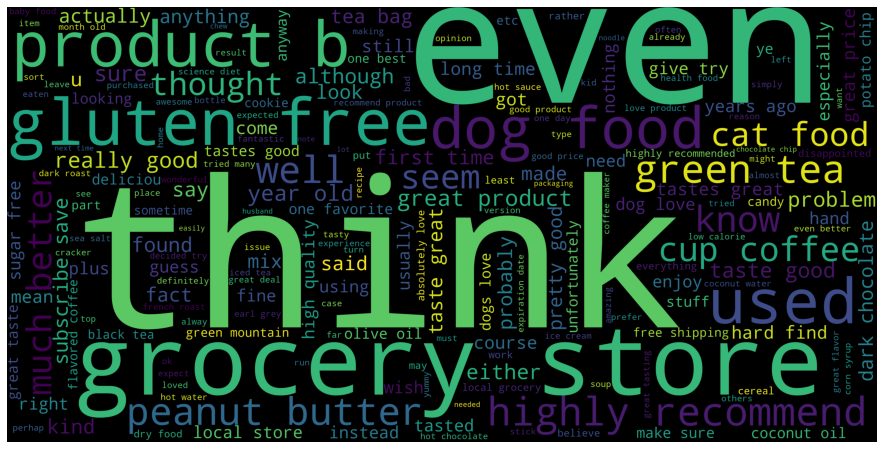

In [39]:
corpus = ' '.join(map(str, review_text))
corpus = corpus.replace("'", "")

# Create a wordcloud object
singles_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(corpus)
plt.figure(figsize=(20,8))
plt.imshow(singles_wordcloud)
plt.axis('off')
# Save the image and show it
# plt.savefig('linkedin_jobs1.png')
plt.show()